In [ ]:
!pip install pingouin
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=c3356d8275223cc6ef435db15f6c4adc8767641937e325d61d877dba4726cc31
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/FER_Results.csv').dropna()
df

,architecture,accuracy,precision,recall,f1 score,loss
0,ResNet50,0.6468,0.6574,0.6259,0.6372,1.0065
1,ResNet50,0.6465,0.6419,0.6344,0.6336,1.0033
2,ResNet50,0.6511,0.6569,0.6391,0.6436,0.9947
3,ResNet50,0.6420,0.6496,0.6242,0.6319,1.0296
4,ResNet50,0.6350,0.6208,0.6226,0.6162,1.0057
7,MobileNetV2,0.5727,0.5435,0.5529,0.5367,1.1613
8,MobileNetV2,0.5785,0.5539,0.5704,0.5576,1.1855
9,MobileNetV2,0.5615,0.5441,0.5336,0.5330,1.1849
10,MobileNetV2,0.5636,0.5494,0.5440,0.5396,1.2028
11,MobileNetV2,0.5664,0.5595,0.5567,0.5528,1.1746


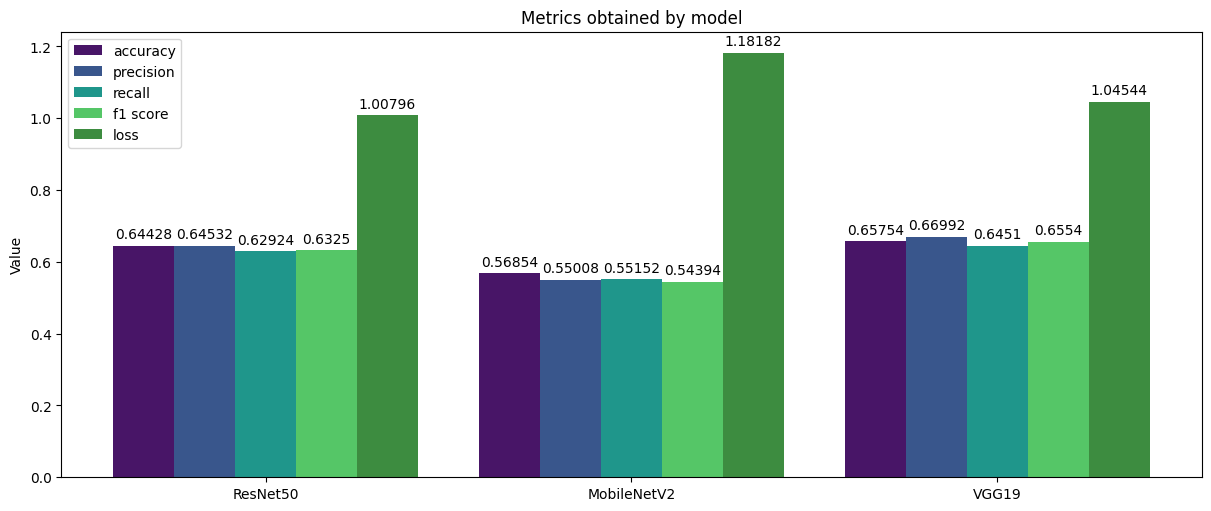

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

architectures = df['architecture'].unique()

architecture_means = {
    'accuracy':  (df.loc[(df['architecture']=='ResNet50')]['accuracy'].mean(),
                  df.loc[(df['architecture']=='MobileNetV2')]['accuracy'].mean(),
                  df.loc[(df['architecture']=='VGG19')]['accuracy'].mean(),),

    'precision': (df.loc[(df['architecture']=='ResNet50')]['precision'].mean(),
                  df.loc[(df['architecture']=='MobileNetV2')]['precision'].mean(),
                  df.loc[(df['architecture']=='VGG19')]['precision'].mean(),),

    'recall':    (df.loc[(df['architecture']=='ResNet50')]['recall'].mean(),
                  df.loc[(df['architecture']=='MobileNetV2')]['recall'].mean(),
                  df.loc[(df['architecture']=='VGG19')]['recall'].mean(),),

    'f1 score':  (df.loc[(df['architecture']=='ResNet50')]['f1 score'].mean(),
                  df.loc[(df['architecture']=='MobileNetV2')]['f1 score'].mean(),
                  df.loc[(df['architecture']=='VGG19')]['f1 score'].mean(),),

    'loss':  (df.loc[(df['architecture']=='ResNet50')]['loss'].mean(),
                  df.loc[(df['architecture']=='MobileNetV2')]['loss'].mean(),
                  df.loc[(df['architecture']=='VGG19')]['loss'].mean(),),
}

x = np.arange(len(architectures))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

# Define a list of colors for each attribute
colors = ['#481567FF', '#39568CFF', '#1F968BFF', '#55C667FF', '#3D8C40']

fig, ax = plt.subplots(figsize=(12,5), layout='constrained')

i = 0
for attribute, measurement in architecture_means.items():
    offset = width * multiplier
    rects = ax.bar(x*1.5 + offset, measurement, width, label=attribute, color=colors[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1
    i = (i+1) % 5

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Metrics obtained by model')
ax.set_xticks(x*1.5 +0.25 + width, architectures)
ax.legend(loc='upper left', ncols=1)
#ax.set_ylim(0, 250)

plt.show()

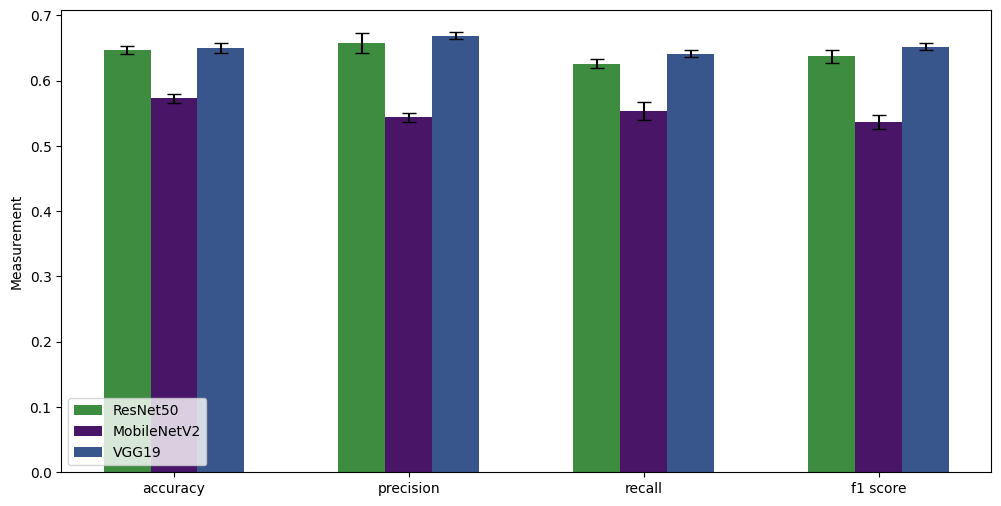

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = {
    'architecture': ['ResNet50']*5 + ['MobileNetV2']*5 + ['VGG19']*5,
    'accuracy': [0.6468, 0.6465, 0.6511, 0.6420, 0.6350, 0.5727, 0.5785, 0.5615, 0.5636, 0.5664, 0.6501, 0.6624, 0.6682, 0.6542, 0.6528],
    'precision': [0.6574, 0.6419, 0.6569, 0.6496, 0.6208, 0.5435, 0.5539, 0.5441, 0.5494, 0.5595, 0.6686, 0.6660, 0.6788, 0.6658, 0.6704],
    'recall': [0.6259, 0.6344, 0.6391, 0.6242, 0.6226, 0.5529, 0.5704, 0.5336, 0.5440, 0.5567, 0.6408, 0.6488, 0.6517, 0.6392, 0.6450],
    'f1 score': [0.6372, 0.6336, 0.6436, 0.6319, 0.6162, 0.5367, 0.5576, 0.5330, 0.5396, 0.5528, 0.6519, 0.6560, 0.6632, 0.6499, 0.6560],
    #'loss': [1.0065, 1.0033, 0.9947, 1.0296, 1.0057, 1.1613, 1.1855, 1.1849, 1.2028, 1.1746, 1.0332, 1.0189, 1.0753, 1.0530, 1.0468]
}

df = pd.DataFrame(data)

# List of metrics
metrics = ['accuracy', 'precision', 'recall', 'f1 score']#, 'loss']

# Set up the plot
width = 0.2  # Width of the bars
colors = ['#3D8C40', '#481567FF', '#39568CFF', ]  # Colors for each architecture

fig, ax = plt.subplots(figsize=(12, 6))

for i, architecture in enumerate(df['architecture'].unique()):
    x = np.arange(len(metrics)) + i * width
    means = df[df['architecture'] == architecture][metrics].values[0]
    std_devs = df[df['architecture'] == architecture][metrics].std().values
    ax.bar(x, means, width, yerr=std_devs, label=architecture, color=colors[i], capsize=5)

#ax.yaxis.grid(True)
ax.set_ylabel('Measurement')
#ax.set_title('Metrics obtained by model')
ax.set_xticks(np.arange(len(metrics)) + width)
ax.set_xticklabels(metrics)
ax.legend(loc='lower left')

plt.savefig("Metrics.svg")
plt.show()

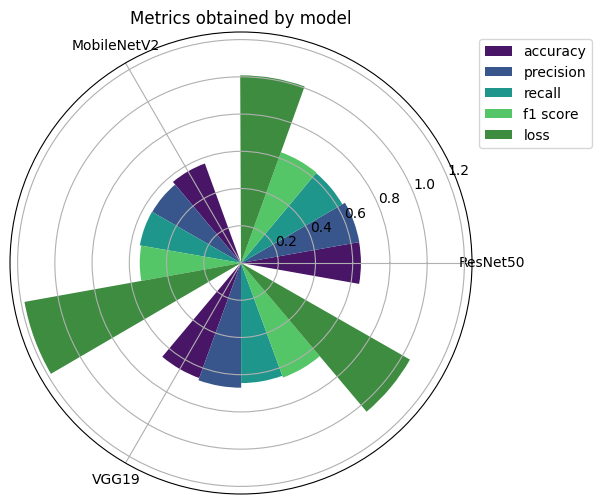

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code here

# Define a list of colors for each attribute
colors = ['#481567FF', '#39568CFF', '#1F968BFF', '#55C667FF', '#3D8C40']

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot(111, projection='polar')

# Convert x-axis ticks to radians
theta = np.linspace(0.0, 2 * np.pi, len(architectures), endpoint=False)

# Define width and bars
width = 0.35
bars = []

i = 0
for attribute, measurement in architecture_means.items():
    bars.append(ax.bar(theta + width * i, measurement, width, label=attribute, color=colors[i]))
    i = (i + 1) % 5

# Set the labels for each bar
ax.set_xticks(theta)
ax.set_xticklabels(architectures)

# Add legend and title
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_title('Metrics obtained by model')

plt.show()


Análisis Estadístico


Hipótesis

¿Hay diferencias en las métricas según el modelo pre-entrenado?

H0 = las medias de todos los grupos son iguales.

H1 = la media de al menos uno de los grupos es distinta.

In [ ]:
#Verificamos normalidad
print(pg.normality(data=df, dv='accuracy', group = 'architecture'))
print(pg.normality(data=df, dv='precision', group = 'architecture'))
print(pg.normality(data=df, dv='recall', group = 'architecture'))
print(pg.normality(data=df, dv='f1 score', group = 'architecture'))
print(pg.normality(data=df, dv='loss', group = 'architecture'))

                     W      pval  normal
architecture                            
ResNet50      0.943217  0.688760    True
MobileNetV2   0.933708  0.621864    True
VGG19         0.909850  0.466689    True
                     W      pval  normal
architecture                            
ResNet50      0.857036  0.217802    True
MobileNetV2   0.924202  0.557399    True
VGG19         0.831812  0.143531    True
                     W      pval  normal
architecture                            
ResNet50      0.881807  0.317579    True
MobileNetV2   0.993056  0.989225    True
VGG19         0.948213  0.724420    True
                     W      pval  normal
architecture                            
ResNet50      0.920770  0.534917    True
MobileNetV2   0.897956  0.398691    True
VGG19         0.928452  0.585853    True


AssertionError: ignored

In [ ]:
#Verificamos igualdad de varianzas
print(pg.homoscedasticity(data=df, dv='accuracy', group = 'architecture'))
print(pg.homoscedasticity(data=df, dv='precision', group = 'architecture'))
print(pg.homoscedasticity(data=df, dv='recall', group = 'architecture'))
print(pg.homoscedasticity(data=df, dv='f1 score', group = 'architecture'))
print(pg.homoscedasticity(data=df, dv='loss', group = 'architecture'))

In [ ]:
# ANOVA
print(stats.f_oneway(df.loc[(df['architecture']=='ResNet50')]['accuracy'],
               df.loc[(df['architecture']=='MobileNetV2')]['accuracy'],
               df.loc[(df['architecture']=='VGG19')]['accuracy']))

print(stats.f_oneway(df.loc[(df['architecture']=='ResNet50')]['precision'],
               df.loc[(df['architecture']=='MobileNetV2')]['precision'],
               df.loc[(df['architecture']=='VGG19')]['precision']))

print(stats.f_oneway(df.loc[(df['architecture']=='ResNet50')]['recall'],
               df.loc[(df['architecture']=='MobileNetV2')]['recall'],
               df.loc[(df['architecture']=='VGG19')]['recall']))

print(stats.f_oneway(df.loc[(df['architecture']=='ResNet50')]['f1 score'],
               df.loc[(df['architecture']=='MobileNetV2')]['f1 score'],
               df.loc[(df['architecture']=='VGG19')]['f1 score']))

print(stats.f_oneway(df.loc[(df['architecture']=='ResNet50')]['loss'],
               df.loc[(df['architecture']=='MobileNetV2')]['loss'],
               df.loc[(df['architecture']=='VGG19')]['loss']))

In [ ]:
#tukey = pairwise_tukeyhsd(endog=df['accuracy'],     # Data
#                          groups=df['architecture'],   # Groups
#                          alpha=0.05)          # Significance level

print(pairwise_tukeyhsd(endog=df['accuracy'], groups=df['architecture'], alpha=0.05))
print(pairwise_tukeyhsd(endog=df['precision'], groups=df['architecture'], alpha=0.05))
print(pairwise_tukeyhsd(endog=df['recall'], groups=df['architecture'], alpha=0.05))
print(pairwise_tukeyhsd(endog=df['f1 score'], groups=df['architecture'], alpha=0.05))
print(pairwise_tukeyhsd(endog=df['loss'], groups=df['architecture'], alpha=0.05))
#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")#x=49.57,ymin=-0.5,ymax=4.5, color="red")

#tukey.summary()